# import modules

In [1]:
import sys

sys.path.insert(0, "../")
from modules.functions_ver2 import *
from modules.plot_utils import *

# define functions

In [3]:
def calculate_mismatch_L_NP_mcz(t_params, s_params, psd=None, **kwargs):
    results = {}
    mcz_arr = np.linspace(10, 90, 250)
    ep_arr = np.zeros(len(mcz_arr))
    opt_ep_arr = np.zeros(len(mcz_arr))
    opt_ep_mcz_arr = np.zeros(len(mcz_arr))

    for i, mcz_L in enumerate(mcz_arr):
        s_params["mcz"] = t_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch(t_params, s_params, psd=psd, **kwargs)["mismatch"]
        ep_arr[i] = ep_NP_L

        opt_ep_results = optimize_mismatch_mcz(t_params, s_params, psd=psd, **kwargs)
        opt_ep_arr[i] = opt_ep_results["ep_min"]
        opt_ep_mcz_arr[i] = opt_ep_results["ep_min_mcz"]

    ep_arr = omit_numerical_errors(ep_arr)
    results = {
        "mcz_arr": mcz_arr,
        "ep_arr": ep_arr,
        "opt_ep_arr": opt_ep_arr,
        "opt_ep_mcz_arr": opt_ep_mcz_arr,
    }

    return results

In [4]:
def plot_mismatch_L_NP_mcz(data, s_params):
    inst = LensingGeo(s_params)
    td = inst.td()
    I = inst.I()

    # plot mismatch vs mcz
    plt.plot(
        data["mcz_arr"],
        data["ep_arr"],
        label=r"$\epsilon(\~h_{\rm L}, \~h_{\rm UL})$",
        ls="-",
        c="black",
    )
    plt.plot(
        data["mcz_arr"],
        data["opt_ep_arr"],
        label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon(\~h_{\rm L}, \~h_{\rm UL})$",
        ls="--",
        c="red",
    )

    mcz_1cyc = (
        (s_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / td))
        / solar_mass
    )
    plt.axvline(x=mcz_1cyc, c="magenta", ls="-", alpha=0.5)

    ep_horizontal = 1 - (1 + I) ** (-1 / 2)
    plt.axhline(y=ep_horizontal, c="grey", ls=":")

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon$")
    plt.legend()

    # plt.title(
    #     r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms, $I$ = {:.3g}".format(
    #         angle_in_pi_format(s_params["theta_S"]),
    #         angle_in_pi_format(s_params["phi_S"]),
    #         angle_in_pi_format(s_params["theta_J"]),
    #         angle_in_pi_format(s_params["phi_J"]),
    #         r"$\mathcal{M}_{\rm s}$",
    #         s_params["mcz"] / solar_mass,
    #         r"$M_{\odot}$",
    #         td * 1e3,
    #         I,
    #     )
    # )

    # plt.suptitle(
    #     r"Mismatch Between a Lensed Source & Unlensed Templates Optimized Over $\mathcal{M}_{\rm t}$"
    # )

In [5]:
def predict_mismatch_L_NP_mcz_critical_points(s_params):
    eta = s_params["eta"]
    inst = LensingGeo(s_params)
    td = inst.td()
    FMIN = 20

    # peaks of epsilon
    n_peak = math.ceil(FMIN * td)
    mcz_peak = (eta ** (3 / 5) * td) / (6 ** (3 / 2) * np.pi * n_peak) / solar_mass
    while mcz_peak >= 10:
        if mcz_peak <= 90:
            plt.axvline(x=mcz_peak, c="pink", ls="-.")
        n_peak += 1
        mcz_peak = (eta ** (3 / 5) * td) / (6 ** (3 / 2) * np.pi * n_peak) / solar_mass

    # troughs of epsilon
    n_trough = math.ceil(FMIN * td - 1 / 2)
    mcz_trough = (
        (eta ** (3 / 5) * td) / (6 ** (3 / 2) * np.pi * (n_trough + 1 / 2)) / solar_mass
    )
    while mcz_trough >= 10:
        if mcz_trough <= 90:
            plt.axvline(x=mcz_trough, c="cyan", ls=":")
        n_trough += 1
        mcz_trough = (
            (eta ** (3 / 5) * td)
            / (6 ** (3 / 2) * np.pi * (n_trough + 1 / 2))
            / solar_mass
        )

In [6]:
def predict_mismatch_L_NP_mcz_flat_points(s_params):
    eta = s_params["eta"]
    inst = LensingGeo(s_params)
    td = inst.td()
    FMIN = 20

    n = 0
    mcz_flat = (eta ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (FMIN + n / td)) / solar_mass
    while mcz_flat >= 10:
        if mcz_flat <= 90:
            plt.axvline(x=mcz_flat, c="green", ls=":")
        n += 1
        mcz_flat = (
            (eta ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (FMIN + n / td)) / solar_mass
        )

# plot mismatch between a L source and NP templates optimized over $\mathcal{M}_{\text{t}}$

y = 0.348, MLz = 2174.55 solar masses
Results saved as ../data/sys3_mismatch_NP_L_td0.03_I0.5_2024-07-23_19-46-34.pkl


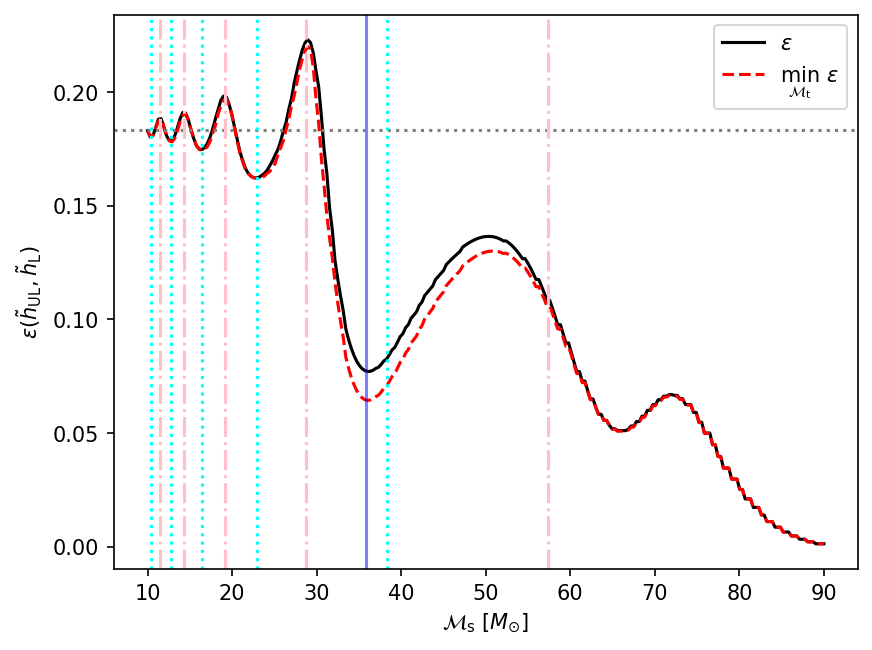

In [8]:
lens_params, NP_params = set_to_location(
    loc_params["Taman"]["random"], lens_params_1, NP_params_1
)
def_td = 0.03
def_I = 0.5
def_y = get_y_from_I(def_I)
def_MLz = get_MLz_from_td(def_td, def_y)
print("y = {:.3g}, MLz = {:.6g} solar masses".format(def_y, def_MLz))
lens_params["y"] = def_y
lens_params["MLz"] = def_MLz * solar_mass

mismatch_NP_L_mcz_results = calculate_mismatch_L_NP_mcz(NP_params, lens_params)
pickle_data(
    mismatch_NP_L_mcz_results,
    "../data",
    "sys3_mismatch_NP_L_td{:.3g}_I{:.2g}".format(def_td, def_I),
)

plot_mismatch_L_NP_mcz(mismatch_NP_L_mcz_results, lens_params)
predict_mismatch_L_NP_mcz_critical_points(lens_params)

# plt.savefig(
#     "../figures/sys3_mismatch_L_NP_mcz_td{:.3g}_I{:.2g}.pdf".format(def_td, def_I),
#     bbox_inches="tight",
# )

y = 0.348, MLz = 2174.55 solar masses


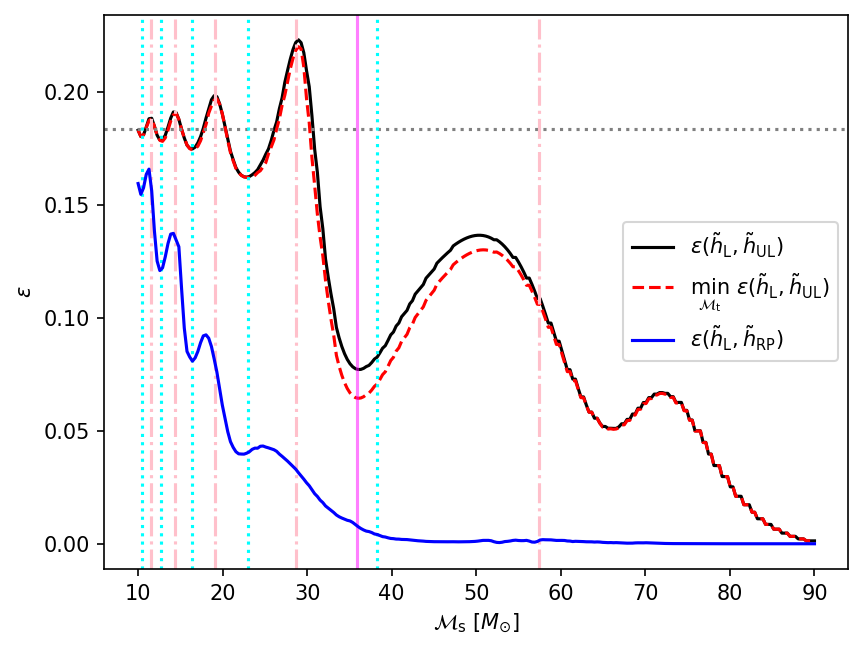

In [7]:
# Get sys3_mismatch_NP_L data
with open(
    "../data/sys3_mismatch_L_NP_td0.03_I0.5_2024-07-23_19-46-34.pkl", "rb"
) as file:
    mismatch_NP_L_mcz_results = pickle.load(file)

mcz_arr = mismatch_NP_L_mcz_results["mcz_arr"]

# Get lens_params
lens_params, NP_params = set_to_location(
    loc_params["Taman"]["random"], lens_params_1, NP_params_1
)
def_td = 0.03
def_I = 0.5
def_y = get_y_from_I(def_I)
def_MLz = get_MLz_from_td(def_td, def_y)
print("y = {:.3g}, MLz = {:.6g} solar masses".format(def_y, def_MLz))
lens_params["y"] = def_y
lens_params["MLz"] = def_MLz * solar_mass

# Plot L vs NP mismatch over mcz
plot_mismatch_L_NP_mcz(mismatch_NP_L_mcz_results, lens_params)
predict_mismatch_L_NP_mcz_critical_points(lens_params)

# Get sys3_contours_mcz data for L vs RP
with open("../data/sys3_contours_mcz_2024-07-24_01-23-17.pkl", "rb") as file:
    mismatch_RP_L_mcz_results = pickle.load(file)

ep_RP_L_arr = [
    np.min(mismatch_RP_L_mcz_results[mcz]["epsilon_matrix"])
    for mcz in np.round(mcz_arr, 6)
]
# Plot RP vs L mismatch over mcz
plt.plot(
    mcz_arr,
    ep_RP_L_arr,
    label=r"$\epsilon(\~h_{\rm L}, \~h_{\rm RP})$",
    ls="-",
    c="blue",
)

plt.legend()

plt.savefig(
    "../figures/sys3_mismatch_mcz_td{:.3g}_I{:.2g}.pdf".format(def_td, def_I),
    bbox_inches="tight",
)

# investigate the waveforms of the peaks and troughs

In [11]:
def plot_waveform_L_NP_mcz_extrema(t_params, s_params):
    eta = s_params["eta"]
    inst = LensingGeo(s_params)
    td = inst.td()
    I = inst.I()
    FMIN = 20

    mcz_1cyc = (
        (s_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / td))
        / solar_mass
    )
    print("mcz_1cyc = {:.3g}".format(mcz_1cyc))

    # peaks of epsilon
    n_peak = math.ceil(FMIN * td)
    mcz_peak = (eta ** (3 / 5) * td) / (6 ** (3 / 2) * np.pi * n_peak) / solar_mass
    while mcz_peak >= 10:
        if mcz_peak <= mcz_1cyc:
            t_params["mcz"] = s_params["mcz"] = mcz_peak * solar_mass
            print(
                "mcz_peak = {:.3g}".format(mcz_peak)
            )  # FOR DEBUGGING AND PROGRESS CHECK
            plot_waveform_comparison(t_params, s_params)
            plt.show()
        n_peak += 1
        mcz_peak = (eta ** (3 / 5) * td) / (6 ** (3 / 2) * np.pi * n_peak) / solar_mass

    # troughs of epsilon
    n_trough = math.ceil(FMIN * td - 1 / 2)
    mcz_trough = (
        (eta ** (3 / 5) * td) / (6 ** (3 / 2) * np.pi * (n_trough + 1 / 2)) / solar_mass
    )
    while mcz_trough >= 10:
        if mcz_trough <= mcz_1cyc:
            t_params["mcz"] = s_params["mcz"] = mcz_trough * solar_mass
            print(
                "mcz_trough = {:.3g}".format(mcz_trough)
            )  # FOR DEBUGGING AND PROGRESS CHECK
            plot_waveform_comparison(t_params, s_params)
            plt.show()
        n_trough += 1
        mcz_trough = (
            (eta ** (3 / 5) * td)
            / (6 ** (3 / 2) * np.pi * (n_trough + 1 / 2))
            / solar_mass
        )

mcz_1cyc = 35.9
mcz_peak = 28.7
idx = -1.08e-08, phi = -0.0786, both should be ~0 if get_updated_mismatch_results is True


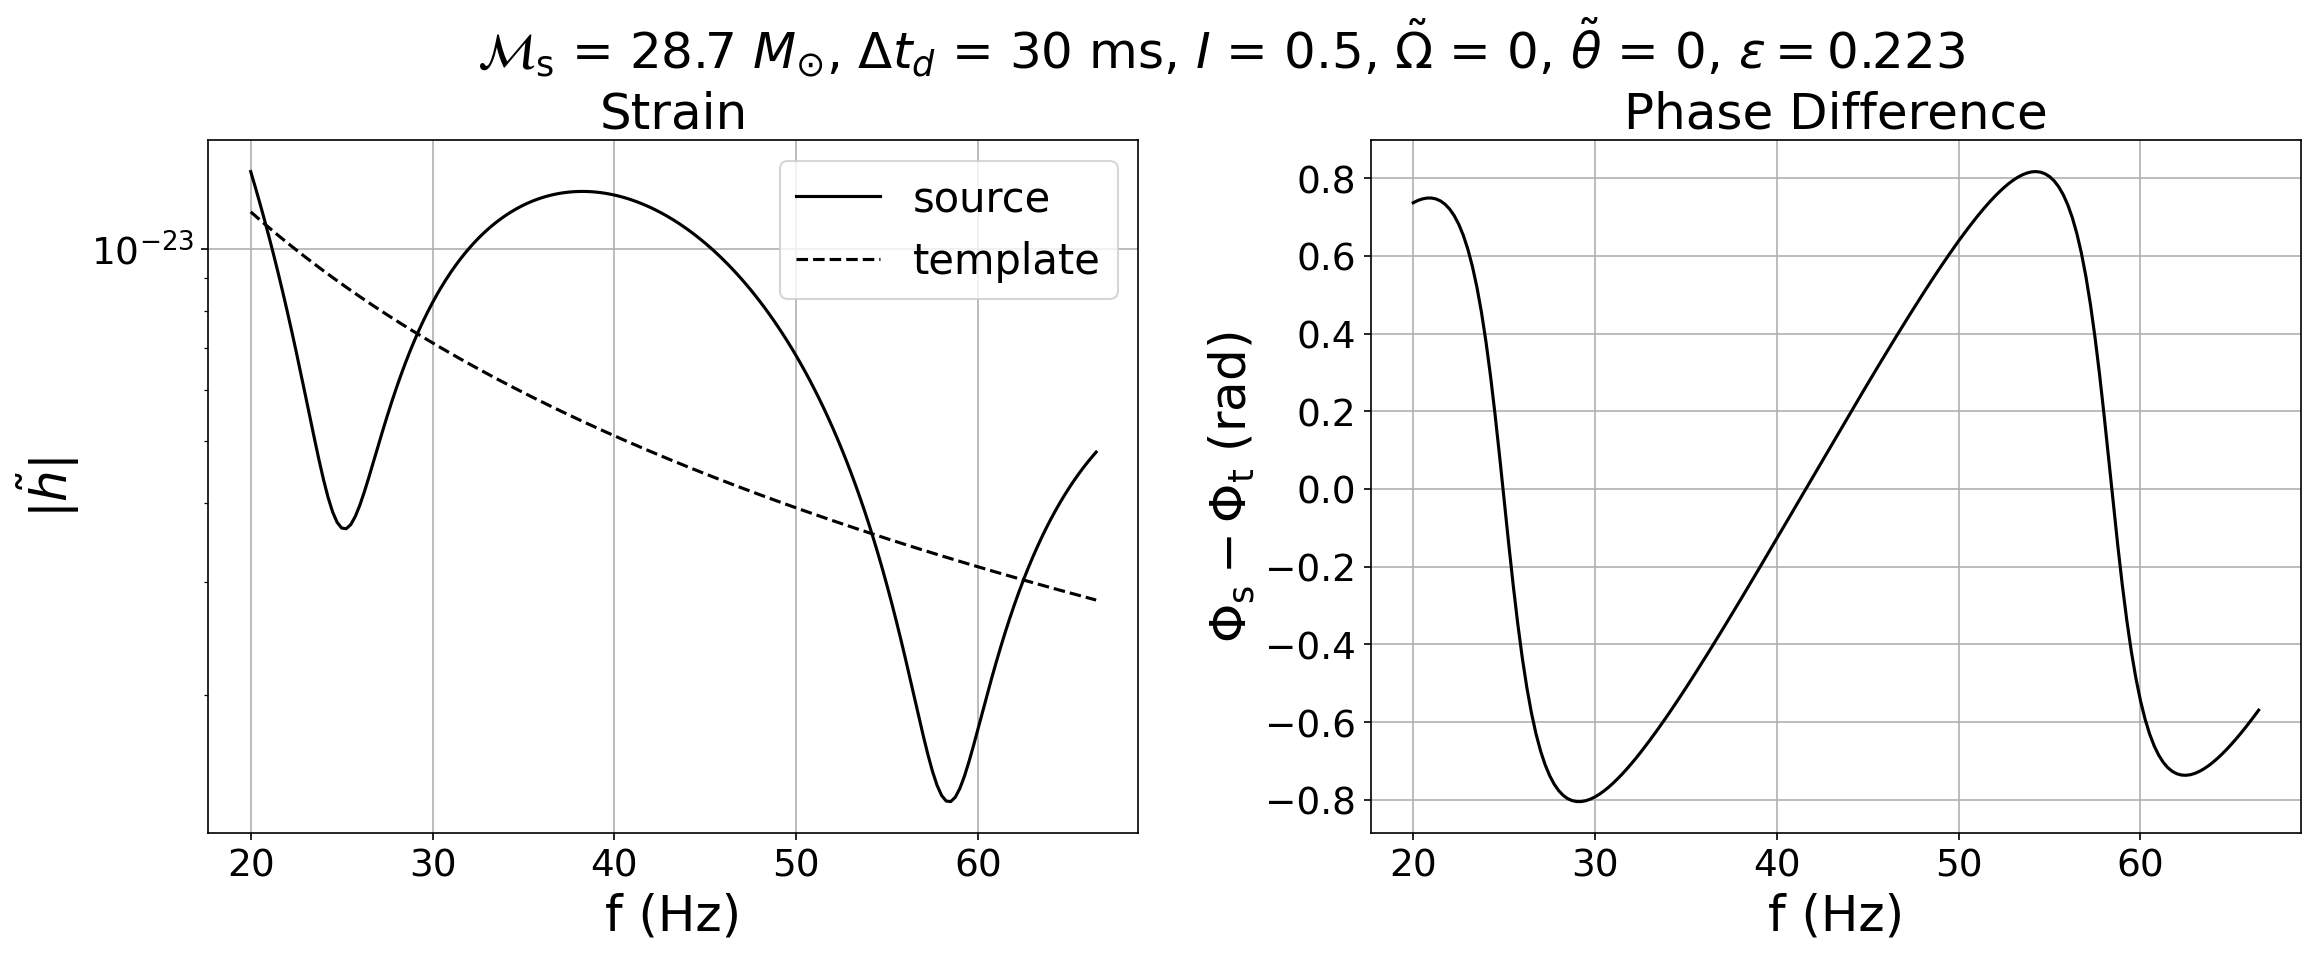

mcz_peak = 19.1
idx = 1.73e-08, phi = 0.0759, both should be ~0 if get_updated_mismatch_results is True


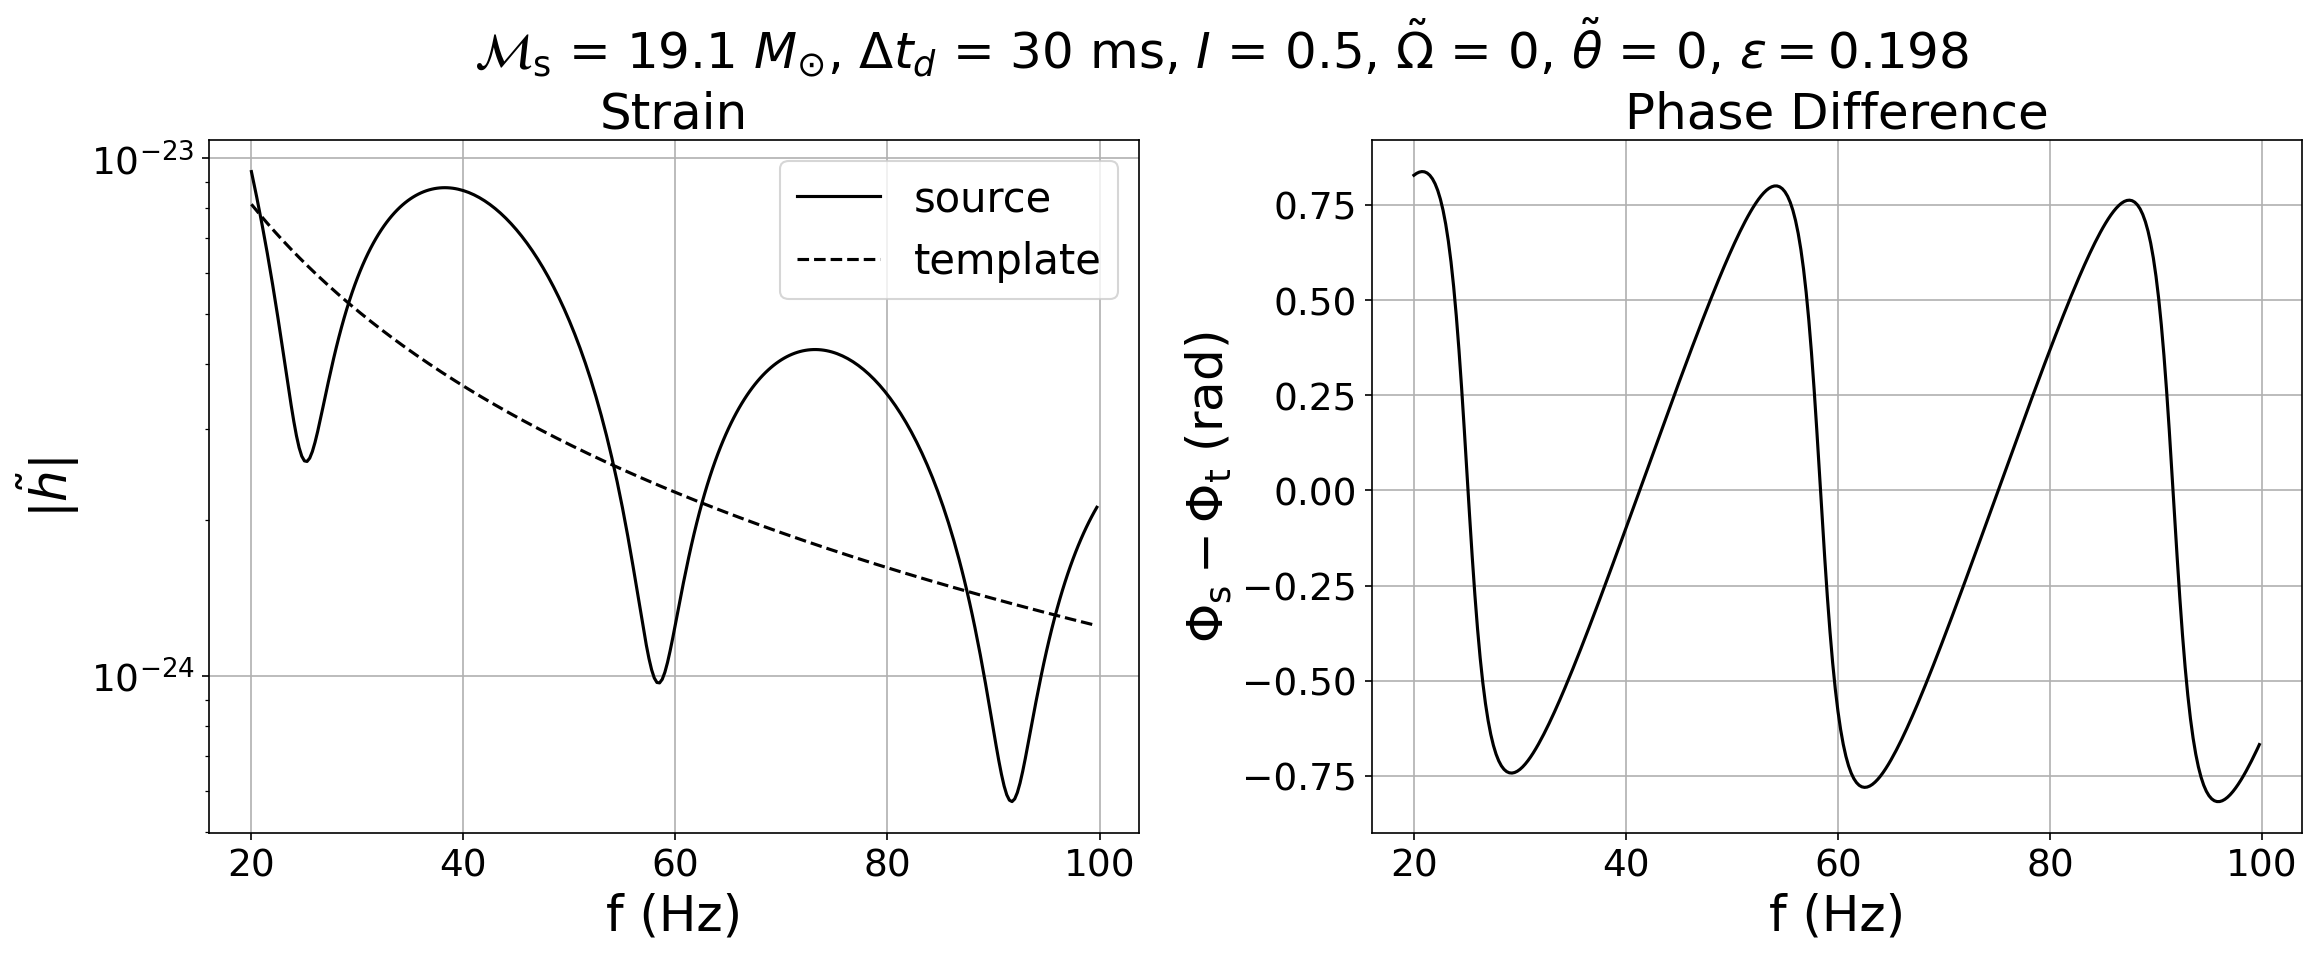

mcz_peak = 14.4
idx = 2.83e-09, phi = 0.0454, both should be ~0 if get_updated_mismatch_results is True


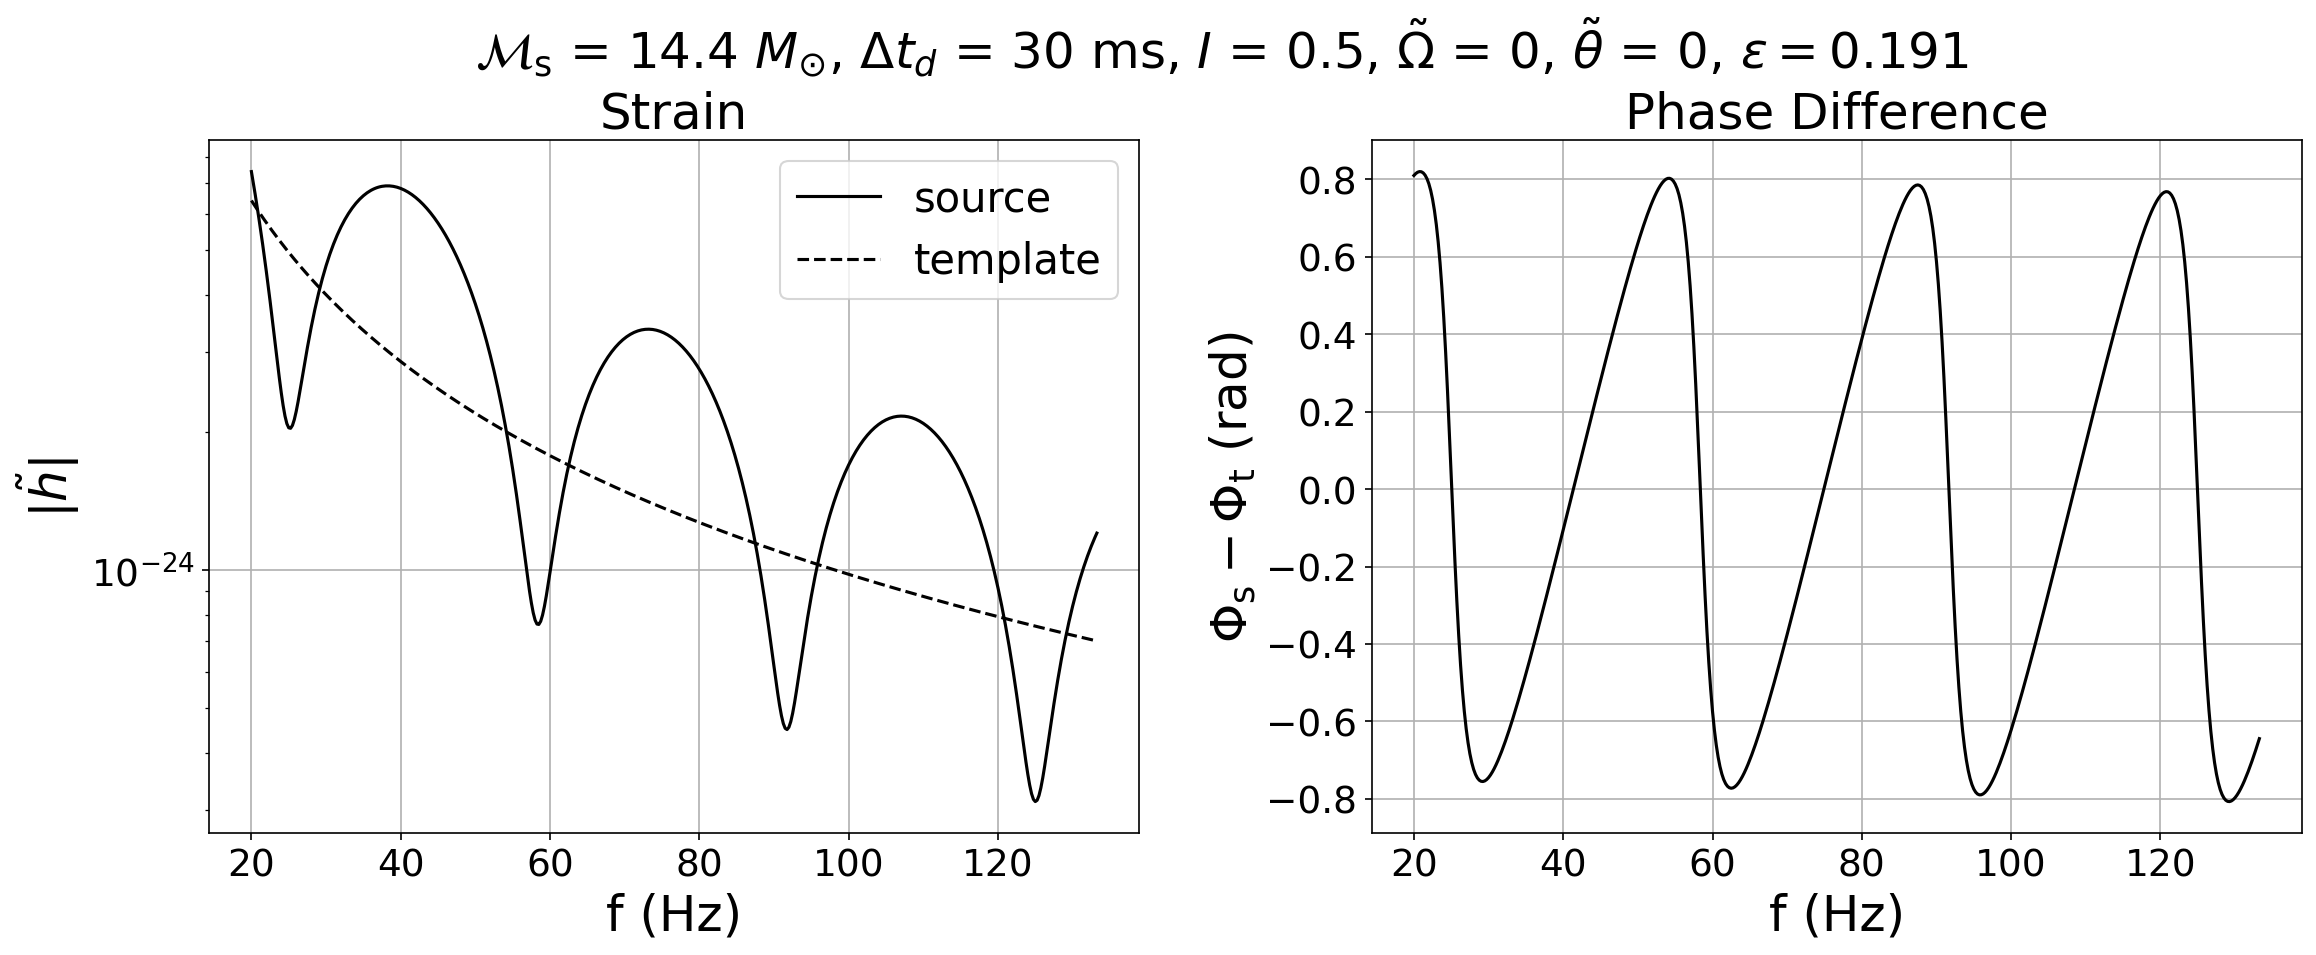

mcz_peak = 11.5
idx = 9.21e-09, phi = 0.0336, both should be ~0 if get_updated_mismatch_results is True


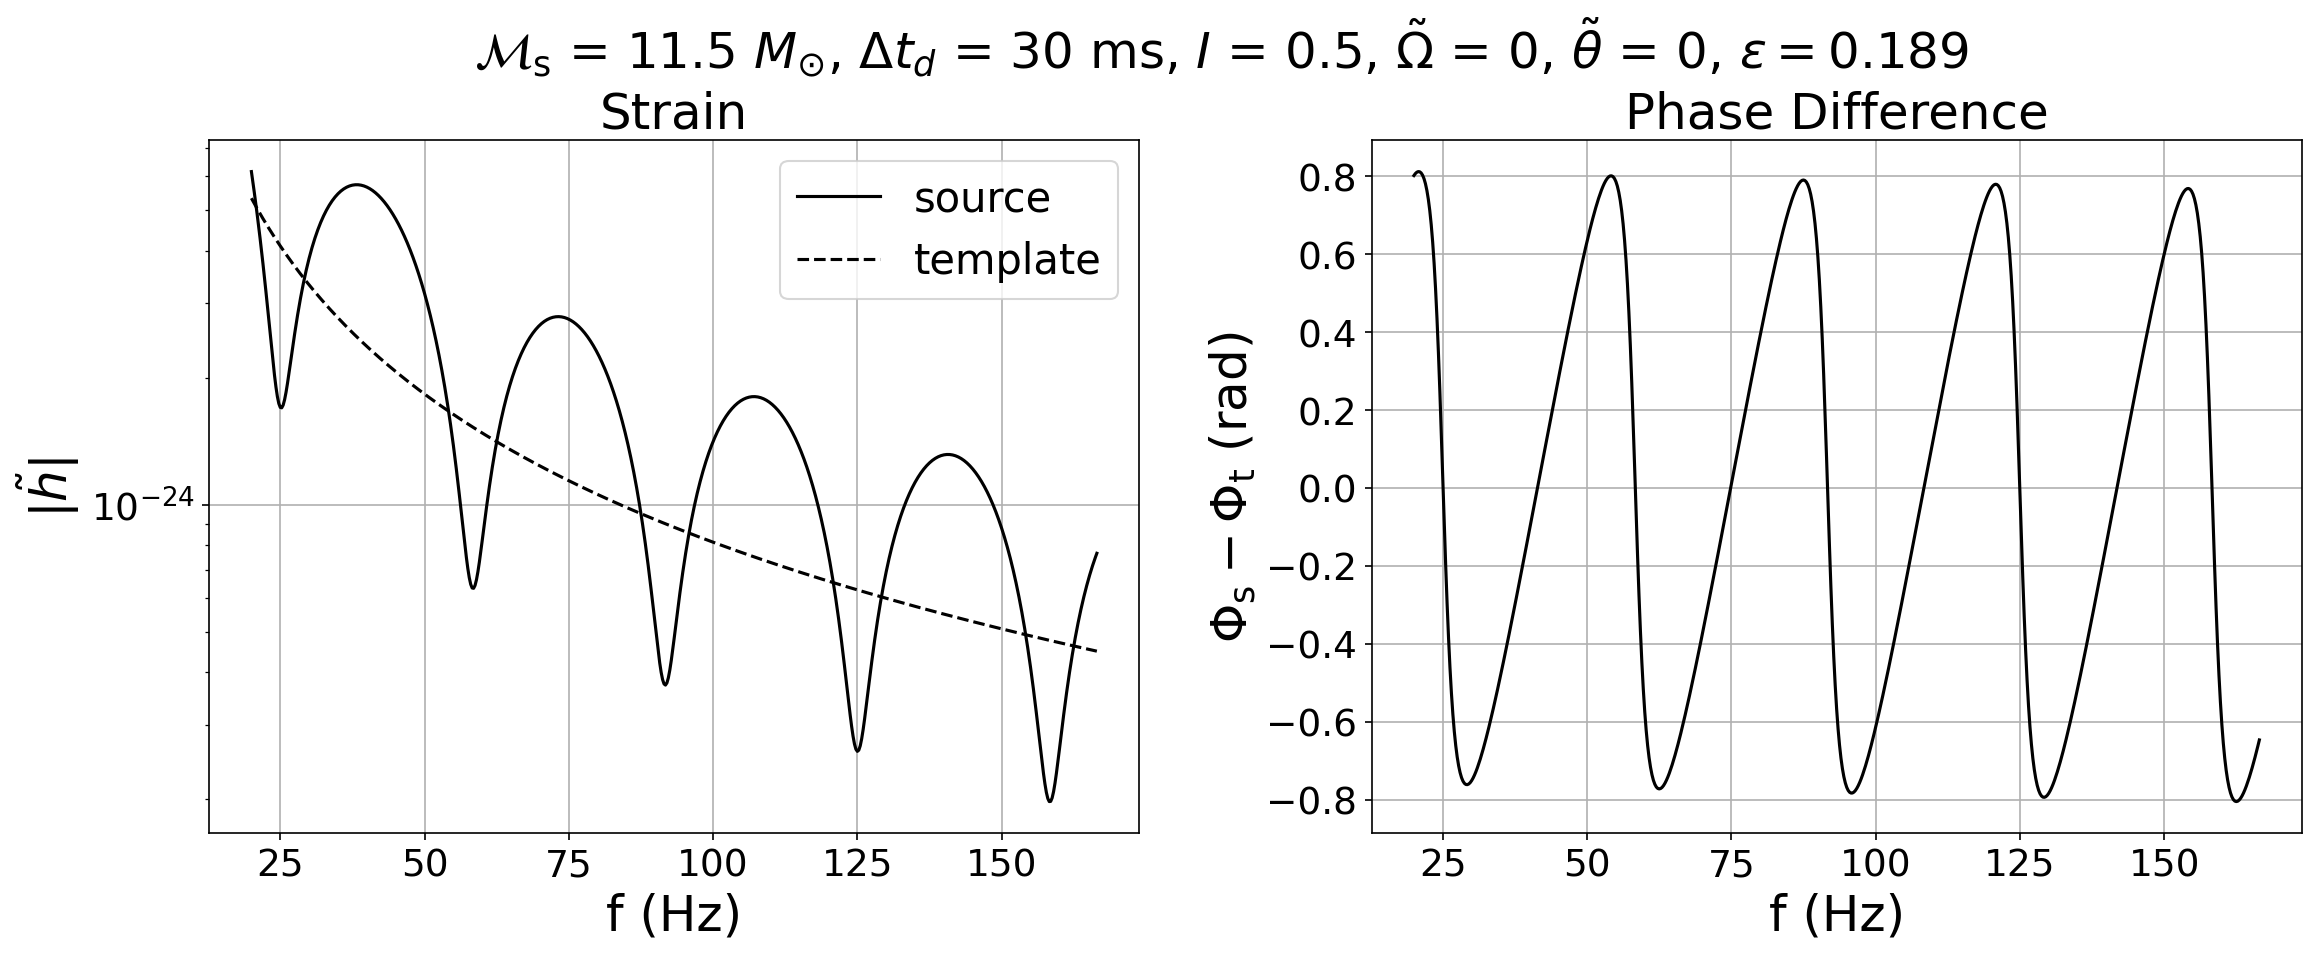

mcz_trough = 23
idx = 3.83e-09, phi = 0.181, both should be ~0 if get_updated_mismatch_results is True


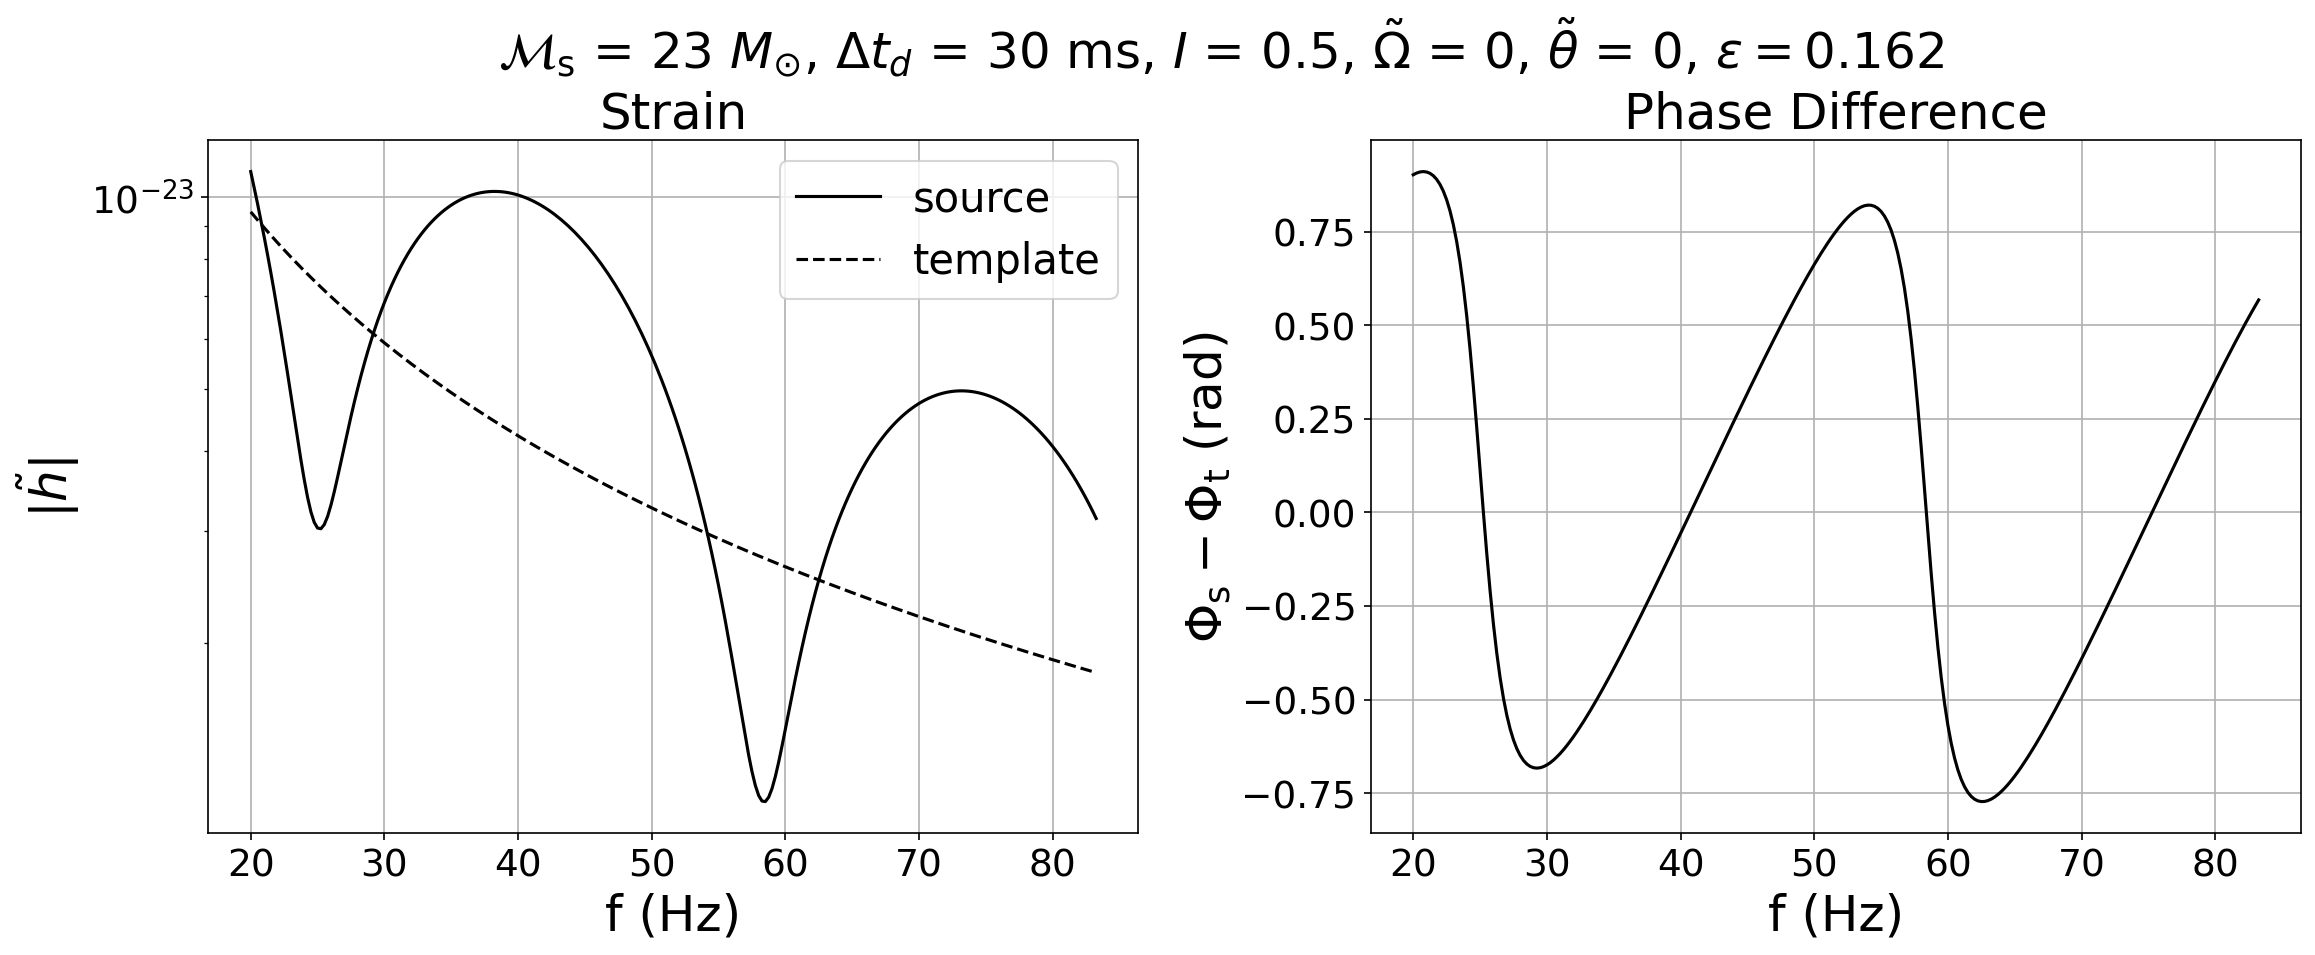

mcz_trough = 16.4
idx = 4.61e-09, phi = 0.0637, both should be ~0 if get_updated_mismatch_results is True


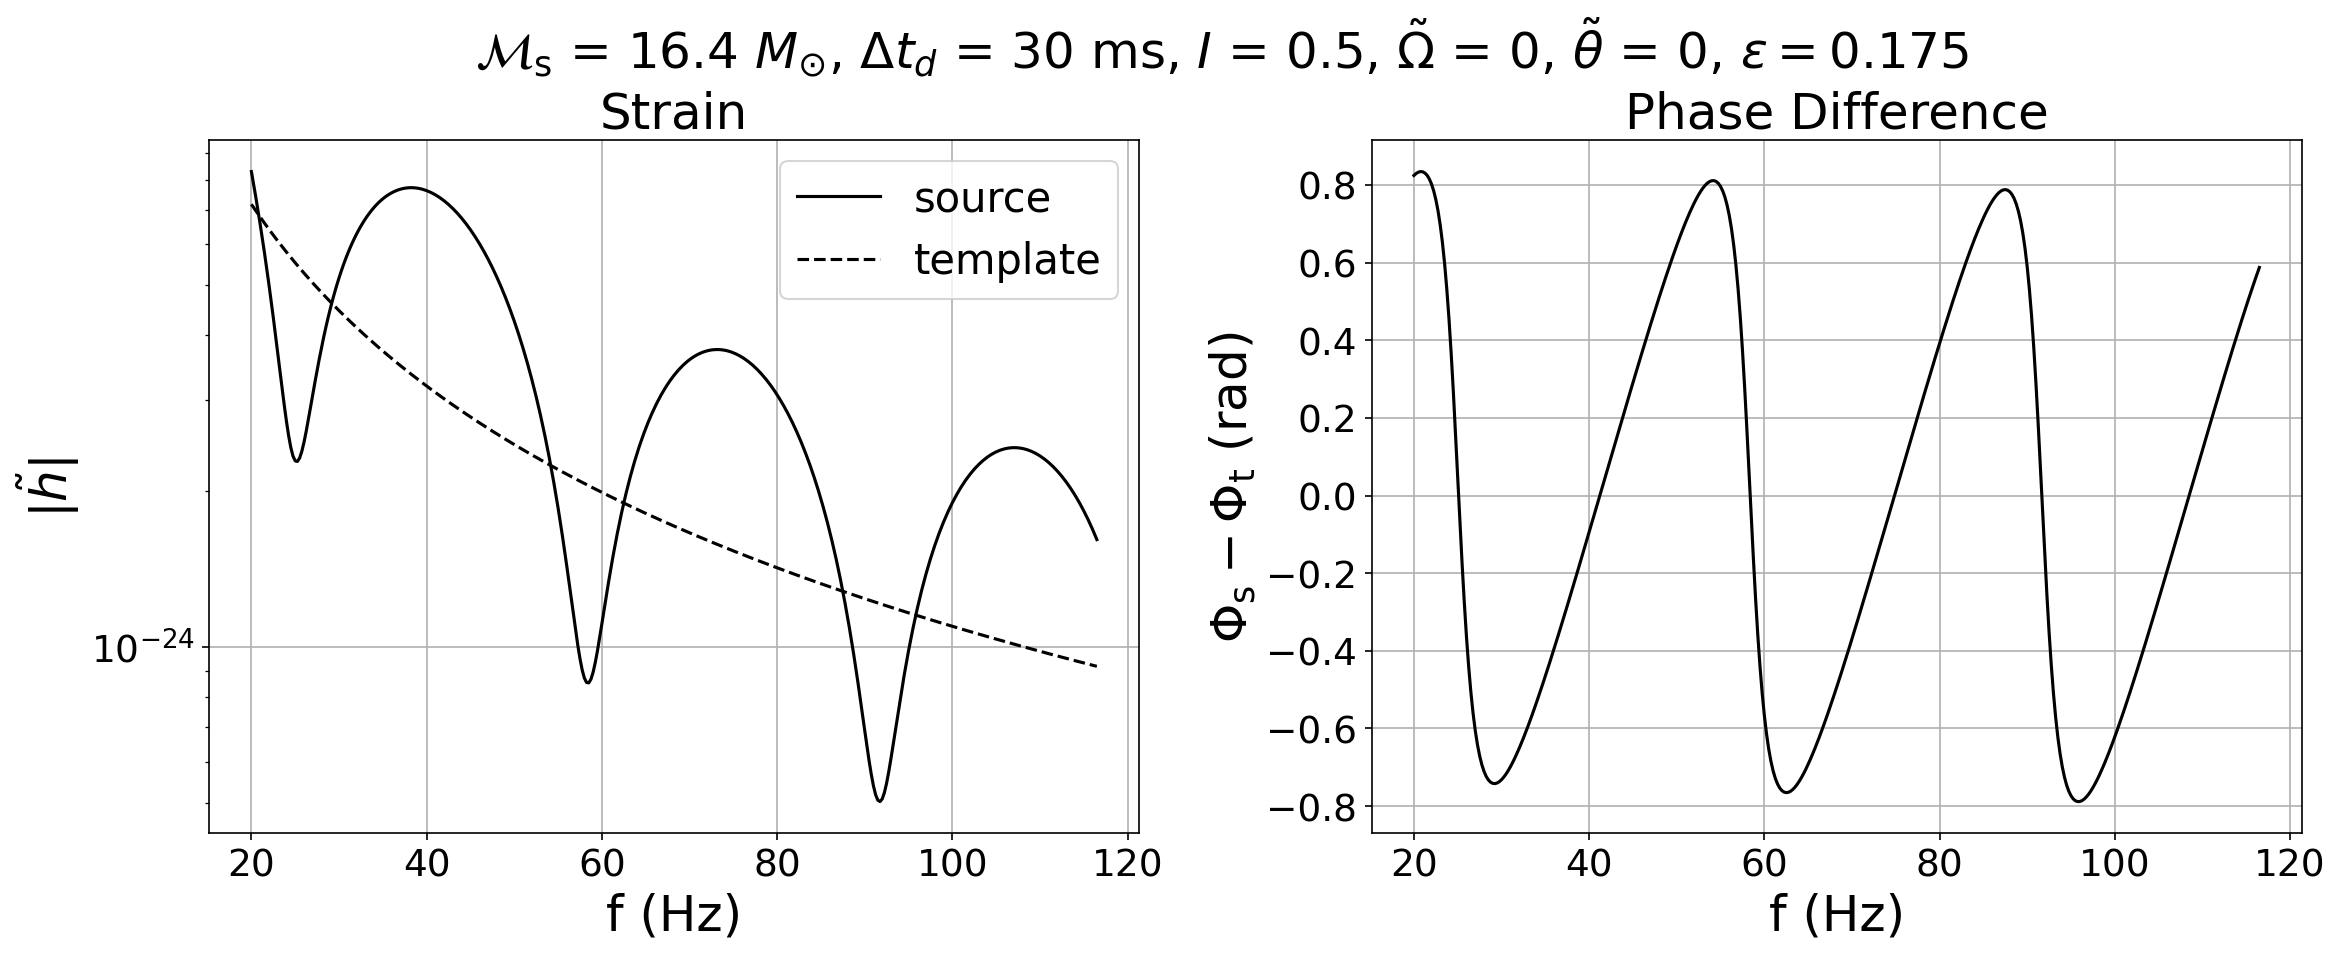

mcz_trough = 12.8
idx = 8.4e-09, phi = 0.0368, both should be ~0 if get_updated_mismatch_results is True


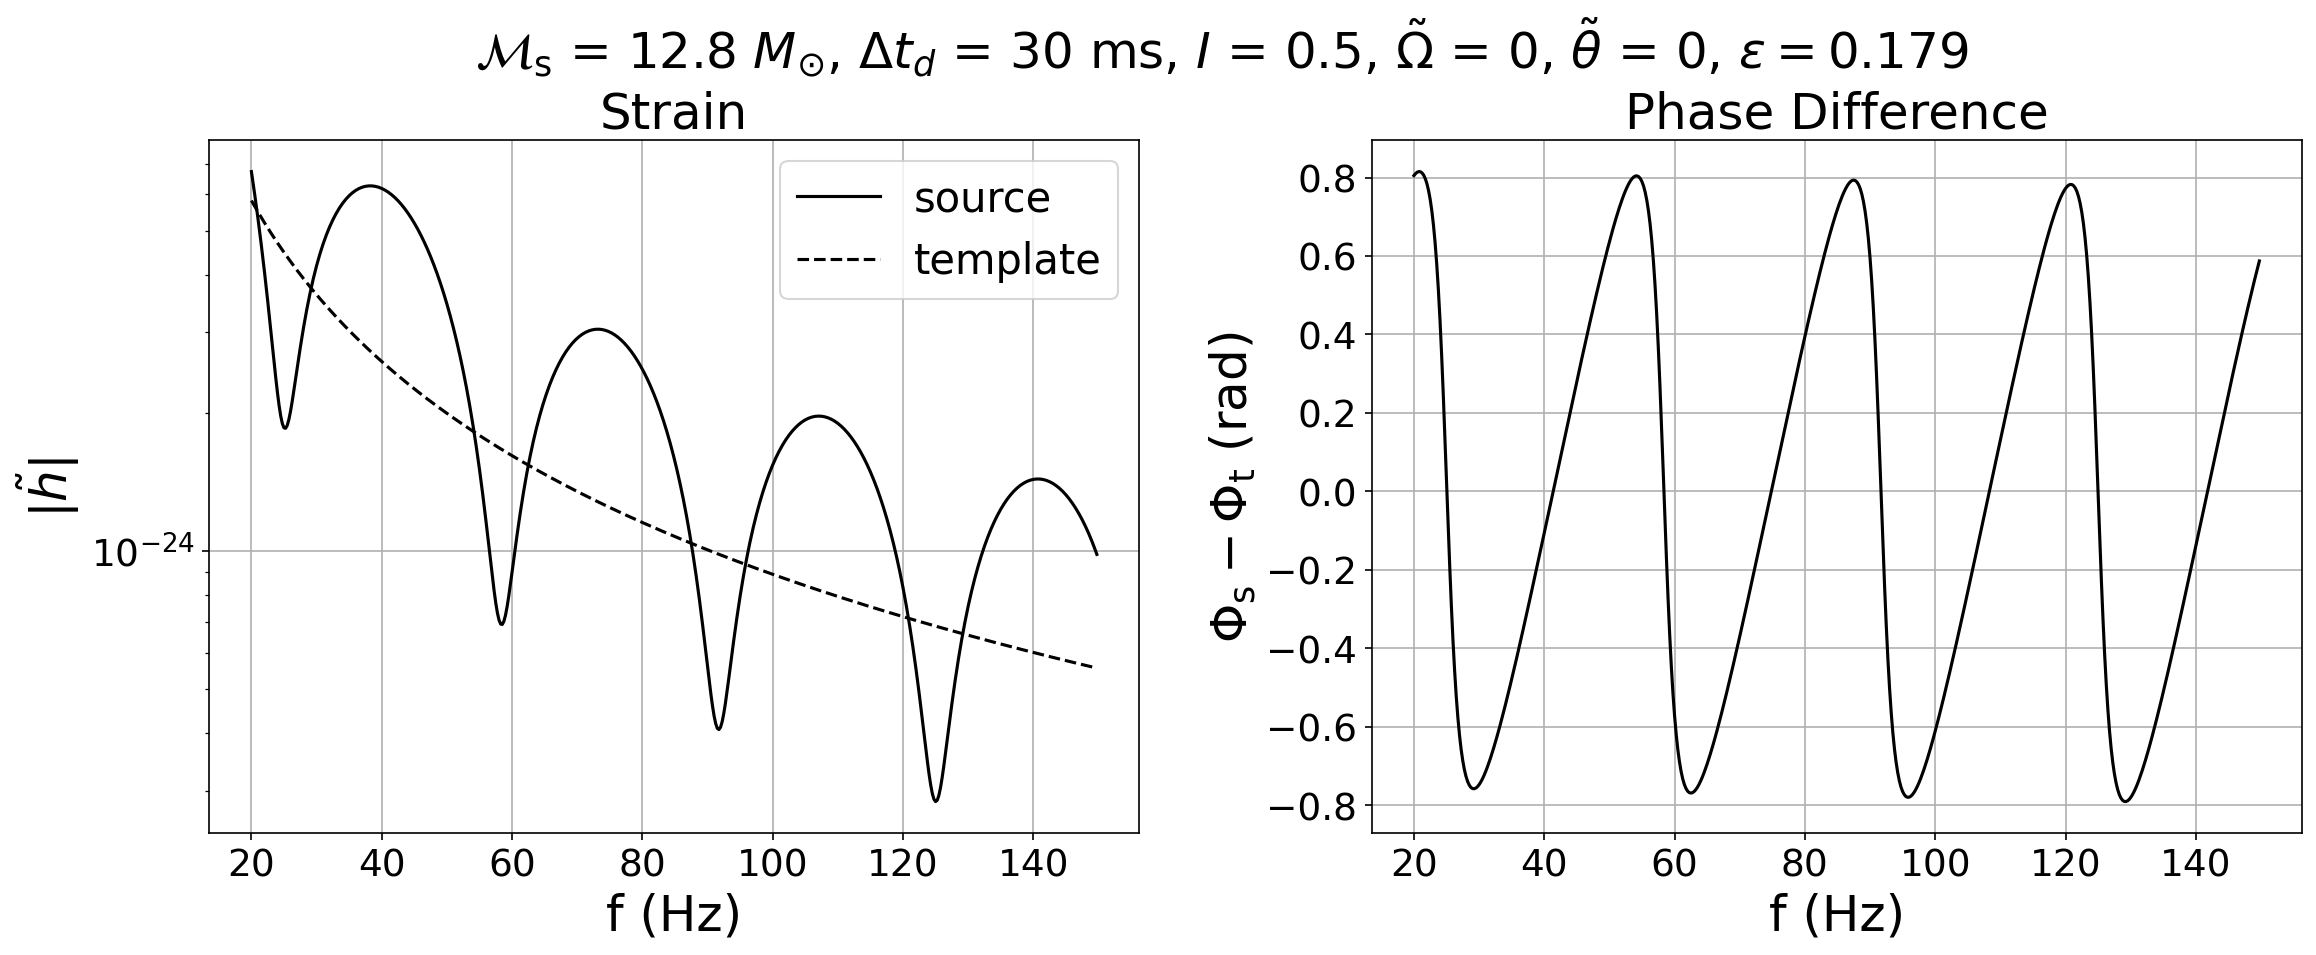

mcz_trough = 10.4
idx = -1.42e-08, phi = 0.0276, both should be ~0 if get_updated_mismatch_results is True


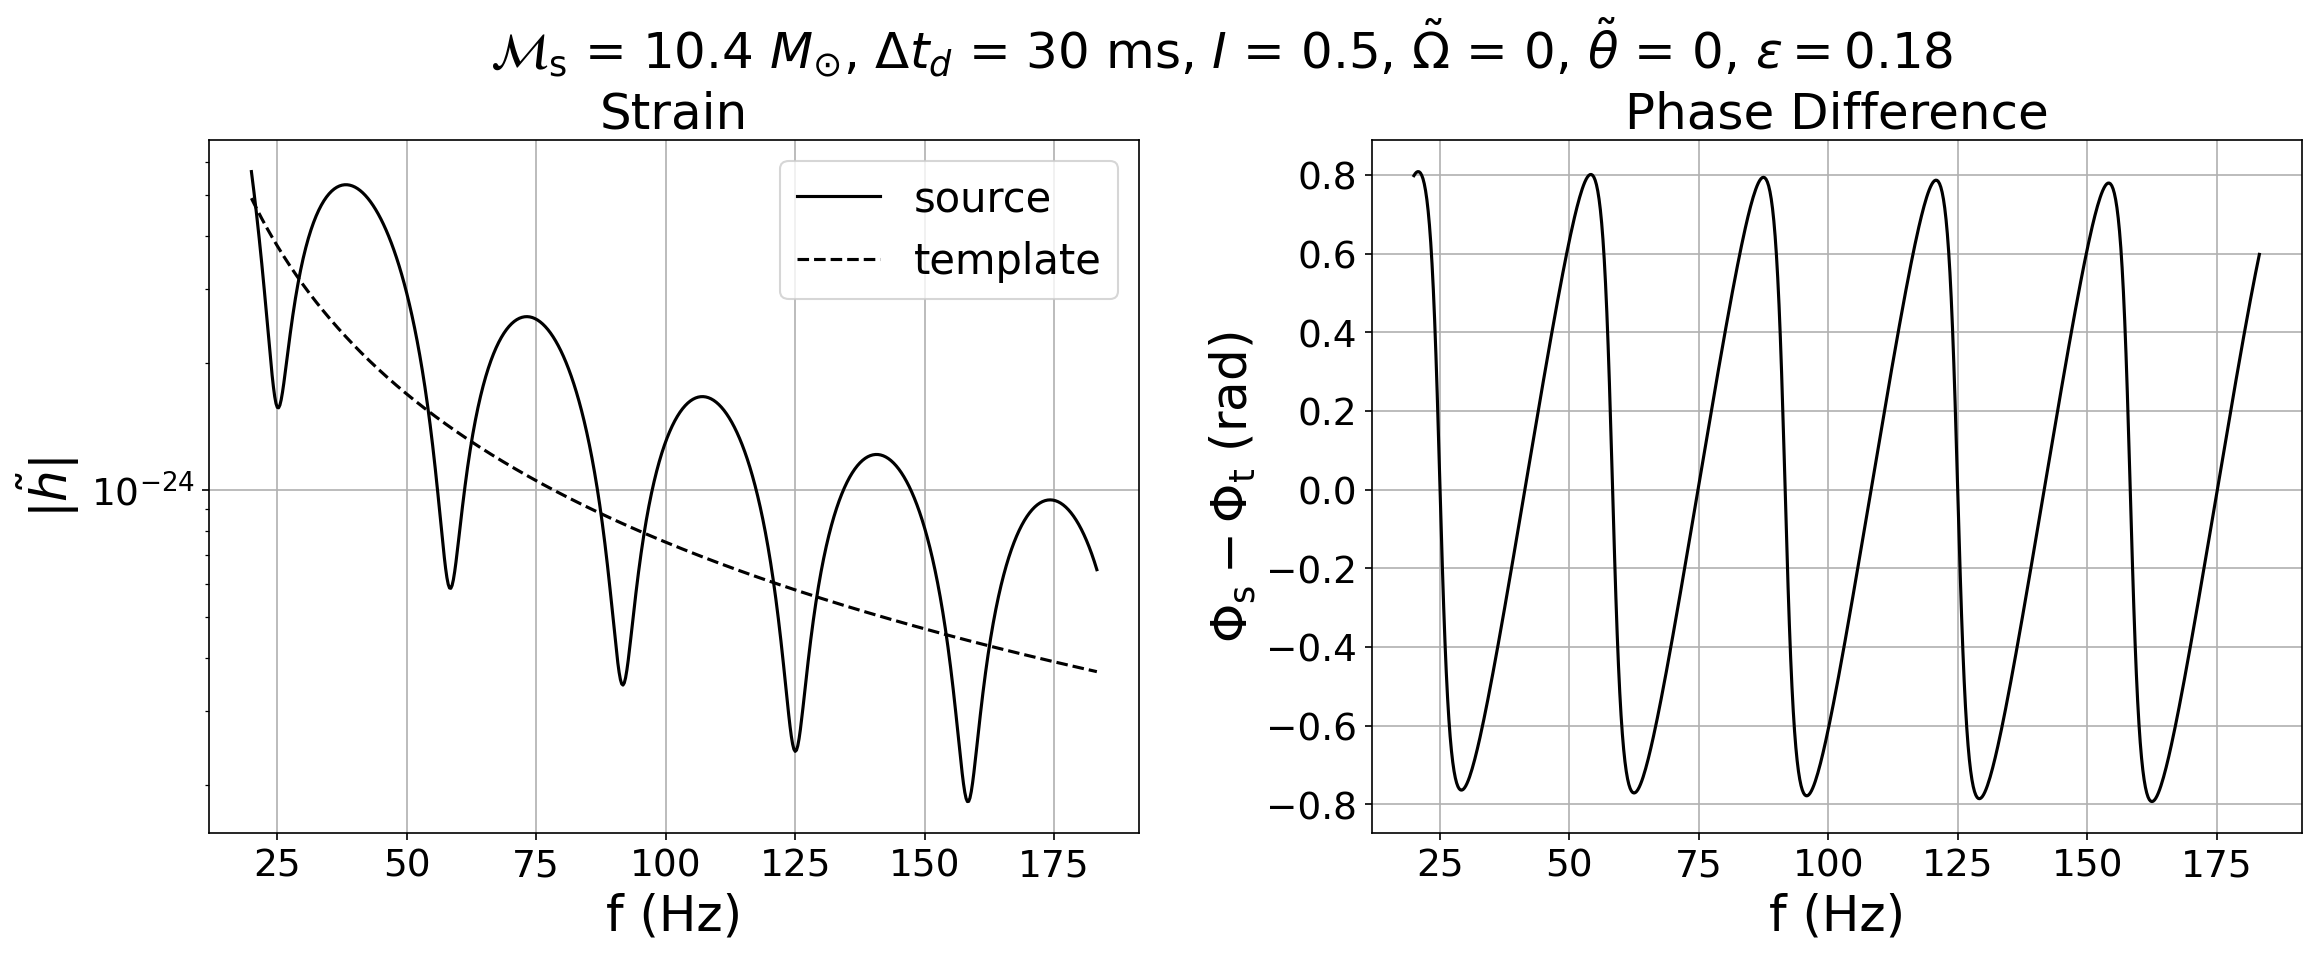

In [12]:
lens_params, NP_params = set_to_location(
    loc_params["Taman"]["random"], lens_params_1, NP_params_1
)
I = 0.5
td = 0.03
y = get_y_from_I(I)
MLz = get_MLz_from_td(td, y)
lens_params["y"] = y
lens_params["MLz"] = MLz * solar_mass

plot_waveform_L_NP_mcz_extrema(NP_params, lens_params)